## Welcome
This is an examplary analysis of the connectivity of the released part of the rat SSCx model of Blue Brain.
It illustrates the use of the "bluepysnap" and "conntility" packages to analyze its connectivity on the cellular level, i.e. as a graph with neurons as nodes and edges between them

### Setup
This file is packaged together with the actual circuit model on Zenodo. 
To run the analyses, you will first have to uncompress the archive containing the circuit model. After unpacking, you will find a file called "circuit_config.json". That file is for the purpose of the analyses the representation of the entire circuit. Note its path, and fill it in in the next cell as prompted.

The analysis packages conntility and bluepysnap can be found on the [Blue Brain github pages](https://github.com/BlueBrain).

Part of the data repository that contained the circuit and this file was "analysis.tar". Extract its contents to ./analysis

Then, we begin by loading the required packages, and listing the different types of connectivity in the model. In the Sonata file format used to describe the model, connectivity is broken up into individual "EdgeSets" that represent different types of connections. Each has a name. Our model has the following EdgeSets:
 - S1nonbarrel_neurons__S1nonbarrel_neurons__chemical: The connections between the neurons in the model according to the Reimann et al., 2015 algorithm for local connectivity
 - midrange__S1nonbarrel_neurons__chemical: The connections between the neurons in the model according to the Reimann et al., 2019 algorithm for long range connectivity. Note: As this is long-range connectivity and this part of the model is rather small, there are not many connections.
 - external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical: Connections from parts of the full model that are not part of this release to neurons that are part of the release according to Reimann et al., 2015. This means that the _source_ of this connectivity is a set of "virtual" neurons that are associated with locations and types, but no morphologies or biophysical models. Hence, they cannot be simulated. Yet, their synapses can serve for certain types of stimuli.
 - external_midrange__S1nonbarrel_neurons__chemical: Connections from parts of the full model that are not part of this release to neurons that are part of the release according to Reimann et al., 2019. Same caveats as the previous.
 - POm__S1nonbarrel_neurons__chemical: Connections from the POm nucleus to neurons in the released model. The sources are also "virtual", hence the same caveats apply.
 - VPM__S1nonbarrel_neurons__chemical: Connections from the VPM nucleus to neurons in the released model. The sources are also "virtual", hence the same caveats apply.

In [1]:
import conntility
import pandas
import numpy
import bluepysnap as snap

from matplotlib import pyplot as plt
%matplotlib inline

# !!! FILL IN LOCATION OF circuit_config.json HERE !!!
cfg_json = "circuit_config.json"

# Load circuit and list edge sets
circ = snap.Circuit(cfg_json)
for con_name, con in circ.edges.items():
    print("""
    Connectome {0} connects
        {1} and {2}
    """.format(con_name, con.source.name, con.target.name))



    Connectome POm__S1nonbarrel_neurons__chemical connects
        POm and S1nonbarrel_neurons
    

    Connectome S1nonbarrel_neurons__S1nonbarrel_neurons__chemical connects
        S1nonbarrel_neurons and S1nonbarrel_neurons
    

    Connectome VPM__S1nonbarrel_neurons__chemical connects
        VPM and S1nonbarrel_neurons
    

    Connectome external_S1nonbarrel_neurons__S1nonbarrel_neurons__chemical connects
        S1nonbarrel_neurons and S1nonbarrel_neurons
    

    Connectome external_midrange__S1nonbarrel_neurons__chemical connects
        S1nonbarrel_neurons and S1nonbarrel_neurons
    

    Connectome midrange__S1nonbarrel_neurons__chemical connects
        S1nonbarrel_neurons and S1nonbarrel_neurons
    


Let's load one of the connectomes for analysis. For technical reasons, the following analyses will not work for the POm and VPM connectomes out of the box. (Though it would take just a bit tinkering to make it work.)

Results will be easies to understand for "S1nonbarrel_neurons__S1nonbarrel_neurons__chemical", i.e. the local recurrent connectivity within the model.

In [2]:
# A dict defines which node (neuron) properties to load. Here, we load:
# The coordinates of their somas in the standard coordinate system (i.e. x is anterior-posterior, etc.)
# The morphological type (mtype) of neurons
# Their coordinates in a different coordinate system: 
#  "ss_flat_x" and "ss_flat_y" provide a flattened view that collapses the layers, 
#  "depth" is cortical depth
#
# For more features of the "load_config" dict, check the conntility documentation
to_load = {
    "loading":{
      "properties": ["x", "y", "z", "mtype", "ss_flat_x", "ss_flat_y", "depth"]
    }
}
# Name of the edge set to load.
connectome="S1nonbarrel_neurons__S1nonbarrel_neurons__chemical"

C = conntility.ConnectivityMatrix.from_bluepy(circ, to_load,
                                              connectome=connectome,
                                              load_full=True)
# We can save the results to an hdf5 file, if we want, for future use
C.to_h5("O1_lcl_con_mat.h5")

/gpfs/bbp.cscs.ch/home/reimann/venvs/bpsnap/lib/python3.10/site-packages/conntility/flatmapping/_supersample_utility.py:136: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  res = Rotation.align_vectors(vtgt, vv)


Rotation errors: min: 0.0, median: 0.09387602600937471, mean: 0.136282418448154, std: 0.15664142313801505, max: 2.0


100%|██████████| 9/9 [00:15<00:00,  1.73s/it]


In [3]:
# If we saved the "ConnectivityMatrix" to an hdf5 file previously, this is how we load it.
C = conntility.ConnectivityMatrix.from_h5("O1_lcl_con_mat.h5")

### Loaded data
The data loaded is represented as a simple adjacency matrix, with the nodes being the neurons. They are associated with the properties specified in the "load_cfg" above.

In [4]:
print(C.matrix) # adjacency matrix view
print(C.vertices)

  (0, 52)	True
  (0, 369)	True
  (0, 700)	True
  (0, 759)	True
  (0, 849)	True
  (0, 2166)	True
  (0, 3281)	True
  (0, 3444)	True
  (0, 3520)	True
  (0, 4116)	True
  (0, 4791)	True
  (0, 5324)	True
  (0, 5329)	True
  (0, 5369)	True
  (0, 5939)	True
  (0, 6190)	True
  (0, 6430)	True
  (0, 6778)	True
  (0, 7095)	True
  (0, 7103)	True
  (0, 7381)	True
  (0, 7620)	True
  (0, 7624)	True
  (0, 7710)	True
  (0, 7783)	True
  :	:
  (211711, 26670)	True
  (211711, 28029)	True
  (211711, 28924)	True
  (211711, 31304)	True
  (211711, 39288)	True
  (211711, 91947)	True
  (211711, 109317)	True
  (211711, 112369)	True
  (211711, 114326)	True
  (211711, 114986)	True
  (211711, 126264)	True
  (211711, 130353)	True
  (211711, 130572)	True
  (211711, 142553)	True
  (211711, 146398)	True
  (211711, 175408)	True
  (211711, 175543)	True
  (211711, 175903)	True
  (211711, 181353)	True
  (211711, 185259)	True
  (211711, 188225)	True
  (211711, 193395)	True
  (211711, 193702)	True
  (211711, 199178)	True
  (21

### Some analysis
As part of this release, the file "connection_distances.py" should have been included. It contains a simple analysis of the overall spatial range of connectivity. It returns the distribution of soma distances of connected pairs of neurons.

We can run this analysis directly:

In [5]:
from analysis.connection_distances import connection_distance_distribution  # Provided as part of this repository

# Some additonal analysis parameters
bins = numpy.arange(0, 2500, 25) # Distance bins to use
max_n_sampled = 10000 # Maximal number of connected pairs to randomly sample. To speed things up...
columns_coordinates = ["x", "y", "z"] # Which properties to use as the coordinates (to calculate distances)

connection_distance_distribution(C.matrix, C.vertices, bins, max_n_sampled, columns_coordinates)

12.5       16
37.5      105
62.5      239
87.5      339
112.5     446
         ... 
2362.5      0
2387.5      0
2412.5      0
2437.5      0
2462.5      0
Length: 99, dtype: int64

We can also run it on only a smaller part of the model. For example, only connectivity between the "L5_TPC:C" type neurons.


In [6]:
# Returns subpopulation where "mtype" "equals" "L5_TPC:C"
# subpopulations can be sampled based on any node property. See the conntility documentation!
subC = C.index("mtype").eq("L5_TPC:C")  
connection_distance_distribution(subC.matrix, subC.vertices,
                                 bins, max_n_sampled, columns_coordinates)

12.5       25
37.5      147
62.5      369
87.5      602
112.5     751
         ... 
2362.5      0
2387.5      0
2412.5      0
2437.5      0
2462.5      0
Length: 99, dtype: int64

To exhaustively analyze all subpopulations, we do not need to iterate them manually though. This functionality is automated.
We need to express this in an "analysis_config".

Within the config, we can define more complex analyses by referencing an "atomic" analysis in a file, and then specifying a "decorator" that executes the analysis for various sub-populations.

In [7]:
analysis_specs = {
    "analyses":{
        "connection_dist_from_type": {  # A name we give to the analysis
            "source": "analysis/connection_distances.py",  # Where to find the "atomic" analysis
            "method": "connection_distance_distribution",
            "args": [  # Additional analysis parameters. Same as before.
                bins,
                10000,
                ["x", "y", "z"]
            ],
            "output": "Series",
            "decorators": [  # Turning it into a more complex analysis
                {
                    "name": "grouped_presyn_by_grouping_config",  # This method analyses sub-matrices M[a, :]
                    "args": [{                                    # where "a" is a sub-population
                        "columns": ["mtype"],  # sub-populations are given by unique labels of this property
                        "method": "group_by_properties"
                    }]
                }
            ]
        },
        "connection_dist_in_pathways": {  # Another analysis to define.
            "source": "analysis/connection_distances.py",  # Same basic "atomic" analysis
            "method": "connection_distance_distribution",
            "args": [  # ... with the same parameters
                bins,
                10000,
                ["x", "y", "z"]
            ],
            "output": "Series",
            "decorators": [ # ... but grouped differently
                {
                    "name": "pathways_by_grouping_config",  # This one analyzes all M[a, b] separately!
                    "args": [{"columns": ["mtype"], "method": "group_by_properties"}]
                }
            ]
        }
    }
}
# After defining all this, execute!
connection_dists_3d = C.analyze(analysis_specs)

Note that we do not need to write the analysis config every time we want to use it. We can store it in a .json file and directly execute it from there. To illustrate, the above dict should be provided with this file as "analysis_specs_1.json". 

The idea is that the user keeps a library of these analyses.

In [8]:
connection_dists_3d = C.analyze("analysis/analysis_specs_1.json")

The result of this is a dict with one entry per defined analysis:
 "connection_dist_from_type" shows the distribution of connected pairs for all outgoing connections from a given mtype
 "connection_dist_in_pathways" shows the disttribution for connections from / to a given pair of mtypes (a "pathway").
 
We can use plot parts of the result.

Text(0, 0.5, 'Cum. distribution')

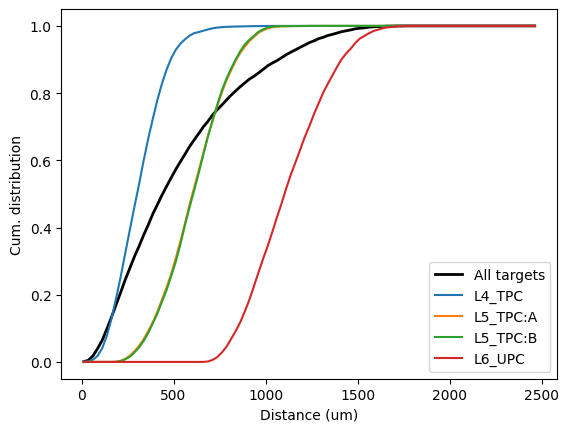

In [9]:
from matplotlib import pyplot as plt

pop_pre = "L3_TPC:C"  # A population of interest.
examples_post = ["L4_TPC", "L5_TPC:A", "L5_TPC:B", "L6_UPC"]  # Some connection targets to plot
ax = plt.figure().gca()

# take relevant parts of the data from the results
plt_data = connection_dists_3d["connection_dist_in_pathways"][pop_pre]
plt_all = connection_dists_3d["connection_dist_from_type"][pop_pre]

# And plot
plt.plot(plt_all.cumsum() / plt_all.sum(), color="black", lw=2.0, label="All targets")  # Distances for all targets
for pop_post in examples_post:
    plt.plot(plt_data[pop_post].cumsum() / plt_data[pop_post].sum(), label=pop_post) # .. and for specific ones.
plt.legend()

ax.set_xlabel("Distance (um)"); ax.set_ylabel("Cum. distribution")

Some more in-depth analysis: We interpolate for each "pathway" the location where the cumulative distribution plotted above reaches 0.5. That is, we calculate the median distance of connected pairs in the pathway.

Then visualize as an image plot

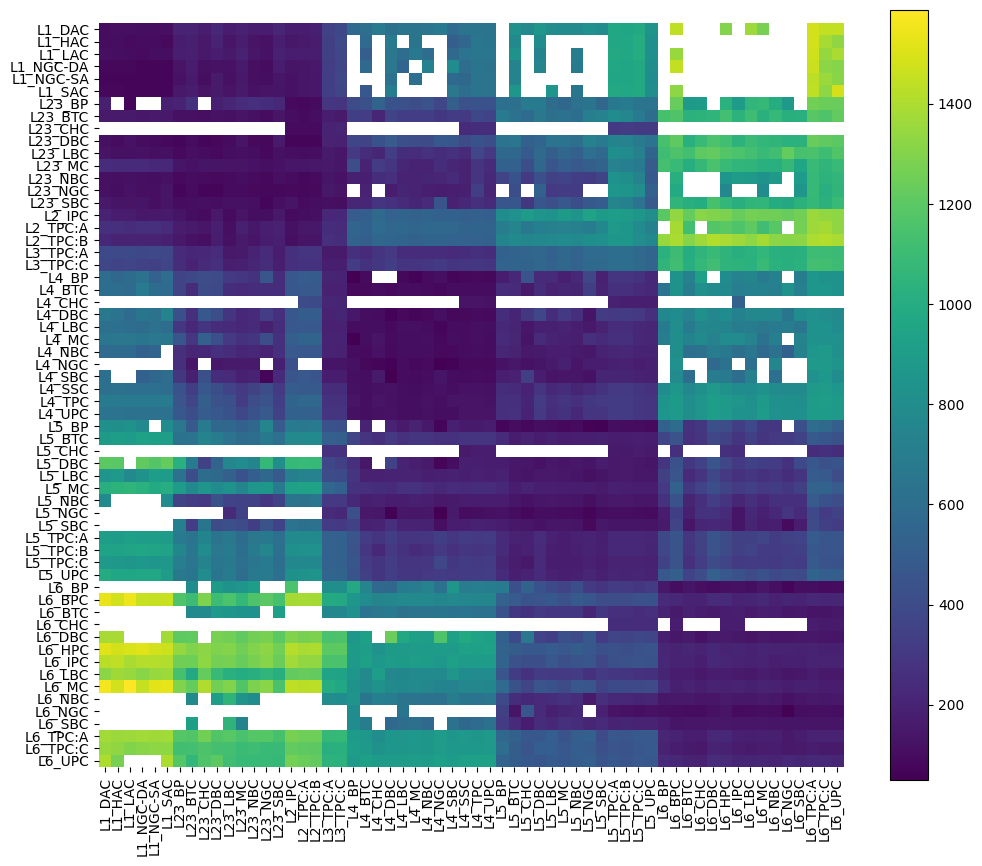

In [10]:
# Names of the MultiIndex columns used to denote the "pathway"
pathway_levels = ["idx-mtype_pre", "idx-mtype_post"]

# Define analysis function
def median_distance(dist_series):
    dist_series = dist_series.droplevel(pathway_levels).cumsum() / dist_series.sum()
    return numpy.interp(0.5, dist_series.values, dist_series.index)

# Define plotting function
def image_plot_dataframe(df, **kwargs):
    fig = plt.figure(figsize=(12., 10.))
    ax = fig.gca()
    
    img = ax.imshow(df.values, **kwargs)
    plt.colorbar(img)
    ax.set_xticks(range(len(df.columns)))
    ax.set_xticklabels(df.columns, rotation="vertical")
    ax.set_yticks(range(len(df.index)))
    ax.set_yticklabels(df.index)
    ax.set_frame_on(False)

# Apply analysis
median_dists = connection_dists_3d["connection_dist_in_pathways"].groupby(pathway_levels).apply(median_distance)
# And plot
fig = image_plot_dataframe(median_dists.unstack(pathway_levels[1]))

By making just a few adjustments, we can slightly alter the analysis. Now we consider the properties "ss_flat_x" and "ss_flat_y" for the calculation of distances. That is, we consider the distance when projected into the horizontal plane.

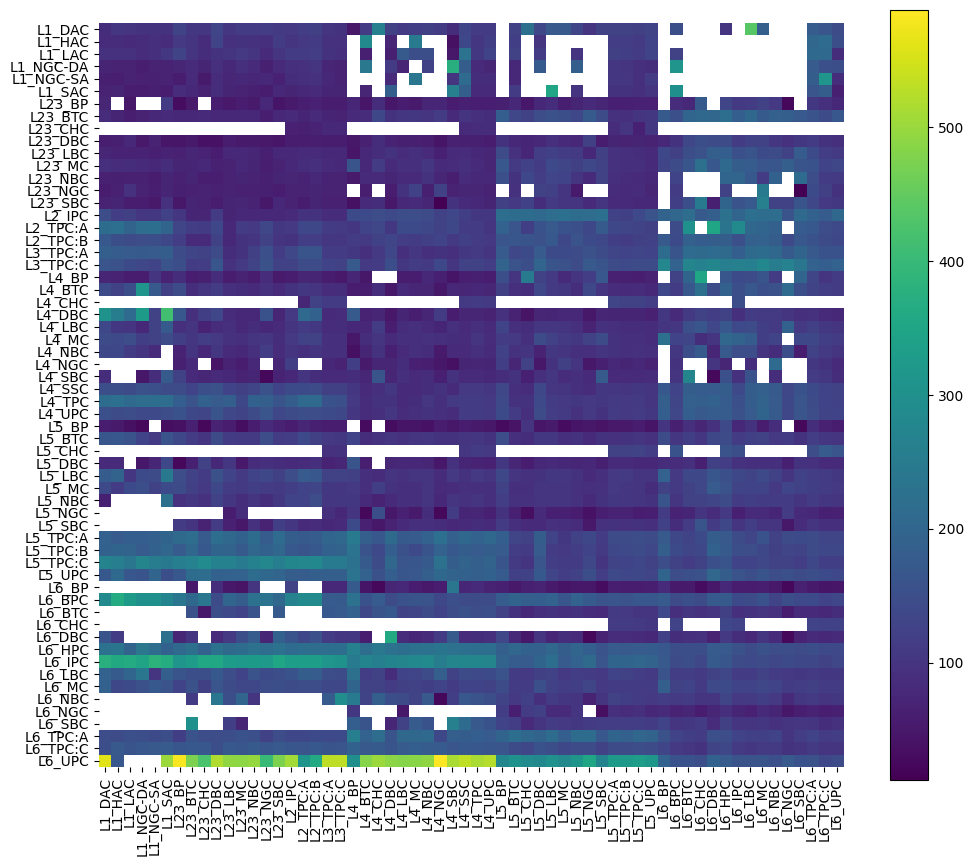

In [11]:
analysis_specs["analyses"]["connection_dist_from_type"]["args"] = [
    bins, 10000, ["ss_flat_x", "ss_flat_y"]
]
analysis_specs["analyses"]["connection_dist_in_pathways"]["args"] = [
    bins, 10000, ["ss_flat_x", "ss_flat_y"]
]

connection_dists_2d = C.analyze(analysis_specs)

median_dists = connection_dists_2d["connection_dist_in_pathways"].groupby(pathway_levels).apply(median_distance)
fig = image_plot_dataframe(median_dists.unstack(pathway_levels[1]))

Or we consider only the vertical offset in depth

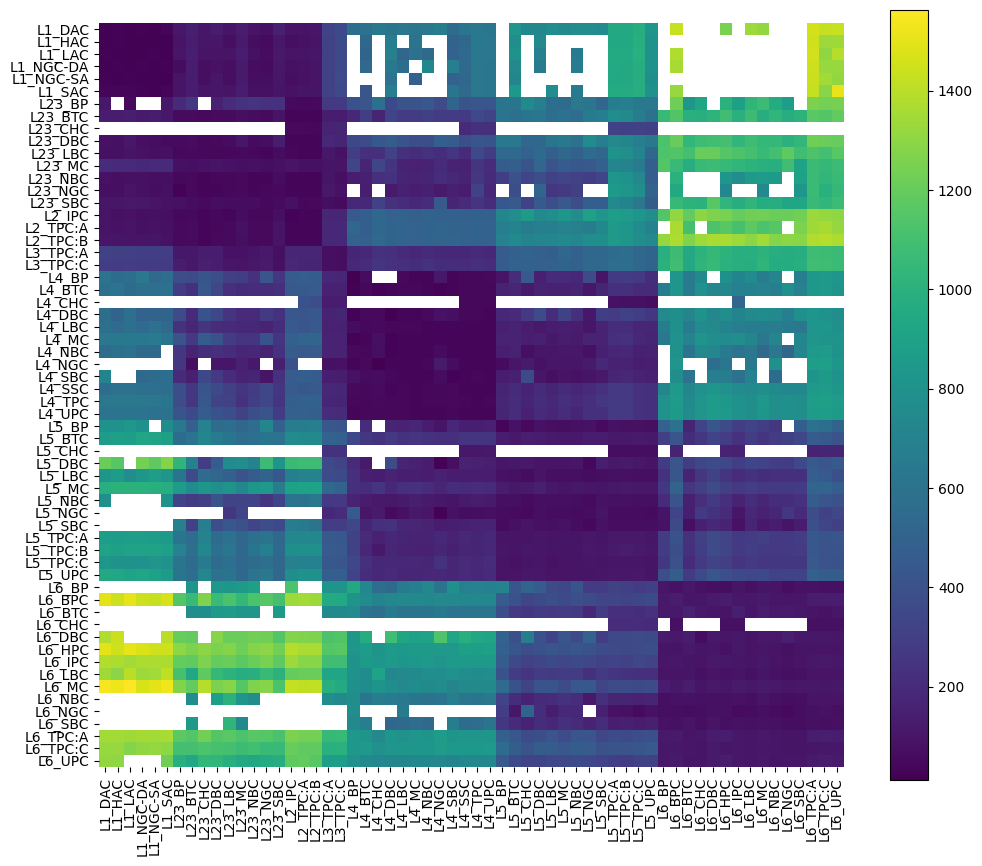

In [12]:
analysis_specs["analyses"]["connection_dist_from_type"]["args"] = [
    bins, 10000, ["depth"]
]
analysis_specs["analyses"]["connection_dist_in_pathways"]["args"] = [
    bins, 10000, ["depth"]
]

connection_dists_depth = C.analyze(analysis_specs)
median_dists = connection_dists_depth["connection_dist_in_pathways"].groupby(pathway_levels).apply(median_distance)
fig = image_plot_dataframe(median_dists.unstack(pathway_levels[1]))